In [3]:
import numpy as np
import pandas as pd

df = pd.read_csv(r'C:\Users\Admin\Downloads\archive (8)\data.csv')
df.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN


In [4]:
df.drop(columns=['id','Unnamed: 32'],axis=1,inplace= True)
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [5]:
y = df['diagnosis']
df.drop(columns = 'diagnosis',axis = 1, inplace = True)
x_ = df
x_.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
x_.shape,y.shape

((569, 30), (569,))

In [7]:
df['area_mean'].describe(), df['compactness_mean'].describe()

(count     569.000000
 mean      654.889104
 std       351.914129
 min       143.500000
 25%       420.300000
 50%       551.100000
 75%       782.700000
 max      2501.000000
 Name: area_mean, dtype: float64,
 count    569.000000
 mean       0.104341
 std        0.052813
 min        0.019380
 25%        0.064920
 50%        0.092630
 75%        0.130400
 max        0.345400
 Name: compactness_mean, dtype: float64)

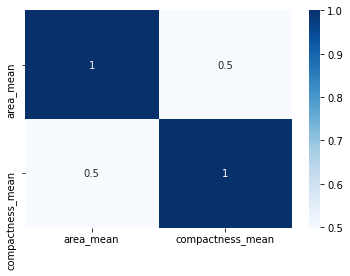

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
x_local = df[['area_mean','compactness_mean',]]
sns.heatmap(x_local.corr(),cmap = 'Blues',annot = True)
plt.show()

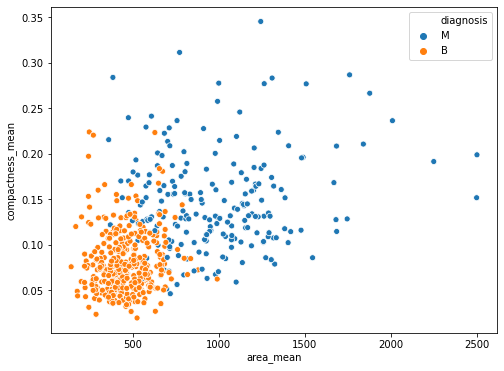

In [9]:


plt.figure(figsize=(8,6),)
sns.scatterplot('area_mean','compactness_mean',hue=y,data=df)
plt.show()

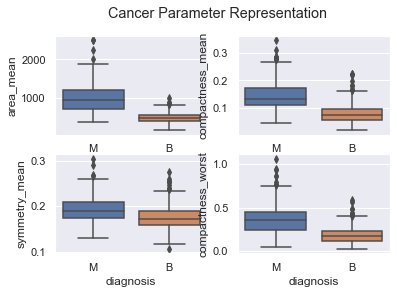

In [10]:
from matplotlib.pyplot import axes, axis
sns.set()
fig,axes = plt.subplots(2,2)
plt.suptitle("Cancer Parameter Representation")
sns.boxplot(data=x_, x=y, y='area_mean', ax=axes[0,0])
sns.boxplot(data=x_, x=y, y='compactness_mean', ax=axes[0,1])
sns.boxplot(data=x_, x=y, y='symmetry_mean', ax=axes[1,0])
sns.boxplot(data=x_, x=y, y='compactness_worst', ax=axes[1,1])



plt.show()

In [35]:
x_ = x_[["area_mean","compactness_mean"]]

x_.shape,y.shape
y = y.replace('B',1)
y = y.replace('M',0)
x_.describe(),y.describe()
y_train = y[:500]
y_train

0      0
1      0
2      0
3      0
4      0
      ..
495    1
496    1
497    1
498    0
499    0
Name: diagnosis, Length: 500, dtype: int64

In [48]:
x_train = x_[["area_mean","compactness_mean"]][:500]
x_train.shape

(500, 2)

In [50]:


from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD
model = Sequential()
model.add(Dense(64,activation='relu',input_dim = 2))
model.add(Dropout(0.5))


model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='softmax'))
sgd = SGD(learning_rate= 0.01,momentum=0.9,nesterov=True)




In [53]:
model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])

model.summary()
model.fit(x_train,y_train,epochs=50,batch_size=128)



Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 64)                192       
                                                                 
 dropout_12 (Dropout)        (None, 64)                0         
                                                                 
 dense_19 (Dense)            (None, 64)                4160      
                                                                 
 dropout_13 (Dropout)        (None, 64)                0         
                                                                 
 dense_20 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4,417
Trainable params: 4,417
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
4/4 [==============================] - 0s

In [54]:
x_test = x_[["area_mean","compactness_mean"]][500:]
y_test = y[500:]
score = model.evaluate(x_test,y_test,batch_size=128)

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\keras\utils\generic_utils.py:923: RuntimeWarning: divide by zero encountered in log10
  numdigits = int(np.log10(self.target)) + 1


OverflowError: cannot convert float infinity to integer

In [13]:
from sklearn.model_selection import train_test_split


In [14]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier

x_train,x_test,y_train,y_test = train_test_split(x_,y,test_size=0.2,random_state=2)


KNN = KNeighborsClassifier(n_neighbors=10,leaf_size=30,metric="minkowski")
KNN.fit(x_train,y_train)
predict = KNN.predict(x_test)
acc = metrics.accuracy_score(y_test,predict)
print(metrics.confusion_matrix(y_test,predict),acc)






[[36  9]
 [ 8 61]] 0.8508771929824561


In [15]:
RF = RandomForestClassifier(n_estimators=200)
RF.fit(x_train,y_train)
predict = RF.predict(x_test)
predict.shape

acc = metrics.accuracy_score(y_test,predict)
acc
print(metrics.confusion_matrix(y_test,predict),acc)


[[41  4]
 [ 8 61]] 0.8947368421052632


In [16]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(x_train,y_train)
predict = DT.predict(x_test)
predict.shape

acc = metrics.accuracy_score(y_test,predict)
acc
print(metrics.confusion_matrix(y_test,predict),acc)


[[40  5]
 [11 58]] 0.8596491228070176


In [17]:
predict_x = DT.predict(x_test[:4])
predict_x

array([1, 1, 1, 0], dtype=int64)

In [18]:
y_test.shape,predict.shape

((114,), (114,))

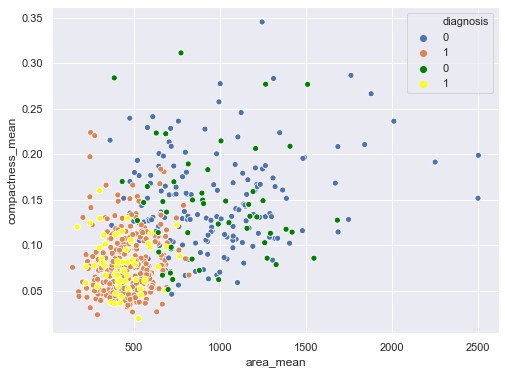

In [19]:

plt.figure(figsize=(8,6),)
#sns.scatterplot('area_mean','compactness_mean',hue=y_test,data=x_)
sns.scatterplot('area_mean','compactness_mean',hue=y,data=df)
sns.scatterplot('area_mean','compactness_mean',hue=predict,data=x_test,palette=['green','yellow'])
plt.show()
